# Лабораторная работа № 2

Вариант 10.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

Определяем функцию statistic, которая вычесляет статистики и выводит несолько графиков.

In [4]:
def statistic(data, name):
    print('Число элементов : ', len(data))
    print('Среднее : ', data.mean())
    print('Min : ', data.min())
    print('Max : ', data.max())
    print('Std : ', data.std())
    print('Median : ', np.median(data))
    first_kvartil = np.percentile(data, 25)
    third_kvartil = np.percentile(data, 75)
    print('25% : ', first_kvartil)
    print('75% : ', third_kvartil)
    print('Межквартильный размах : ', third_kvartil - first_kvartil)
    print('Mode : ', st.mode(data))
    print('Skew : ', st.skew(data))
    print('kurtosis : ', st.kurtosis(data))
    print()
    
    print('Гистограмма:')
    sns.distplot(data, axlabel=name, norm_hist=True)
    plt.show()
    print('\"Ящик с усами\":')
    sns.boxplot(data=data)
    plt.show()
    print('График \"Квантиль квантиль\":')
    res = st.probplot(data, plot=plt)
    plt.show()

Определяем функцию checkNormalDistr, которая выводит резельтаты примененя трех критериев(Космогорова-Смирнова, Пирсона, функции normaltest(описана ниже)).

In [5]:
def checkNormalDistr(data, name):
    m, s, size = data.mean(), data.std(), data.size
    
    print('Параметр: ', name, '\n')
    print('Критерий Колмогорова-Смирнова:')
    stat, p = st.kstest(data, 'norm', args=(m, s))
    print('(', stat, p, ')')
    if p < 0.05:
        print('Выборка не подчиняется нормальному закону распределения.')
    else:
        print('Выборка подчиняется нормальному закону распределения.', '\n')

    print('Кси^2 критерий Пирсона:')
    stat, p = st.pearsonr(data, np.random.normal(m, s, size))
    print('(', stat, p, ')')
    if p < 0.05:
        print('Выборка не подчиняется нормальному закону распределения.')
    else:
        print('Выборка подчиняется нормальному закону распределения.', '\n')

    print('Преверим так же функцию normaltest из scipy.stats на принадлежность к нормальному закону распределения')
    stat, p = st.normaltest(data)
    print('(', stat, p, ')')
    if p < 0.05:
        print('Выборка не подчиняется нормальному закону распределения.')
    else:
        print('Выборка подчиняется нормальному закону распределения.', '\n')

### normaltest from scipy.stats
Фукнция normaltest из scipy.stats:
Проверяте отличается ли выборка от нормального закона распределени (использует D’Agostino’s K^2 Test).

Return:
statistic: s^2 + k^2, где s - это значение отличия асимметрии выборки от асимметрии норм выборки, так же и с k =  эксцессом.

pvalue: pvalue для проверки нулевой гипотезы.

In [12]:
all_data = pd.read_csv('data/iris.csv')
# sns.load_dataset('iris')

In [13]:
all_data.head()

sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

In [14]:
all_data['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

Удаляем из выборки variety = 'Setosa', т.е. получаем выборку исходя из варианта ( у меня 10 - 'Versicolor' + 'Virginica' )

In [15]:
data = all_data[all_data['variety'] != 'Setosa']

Проверим в выборке, соответствующие переменным Sepal.Length, Sepal.Width, Petal.Length, Petal.Width на независимость и однородность;

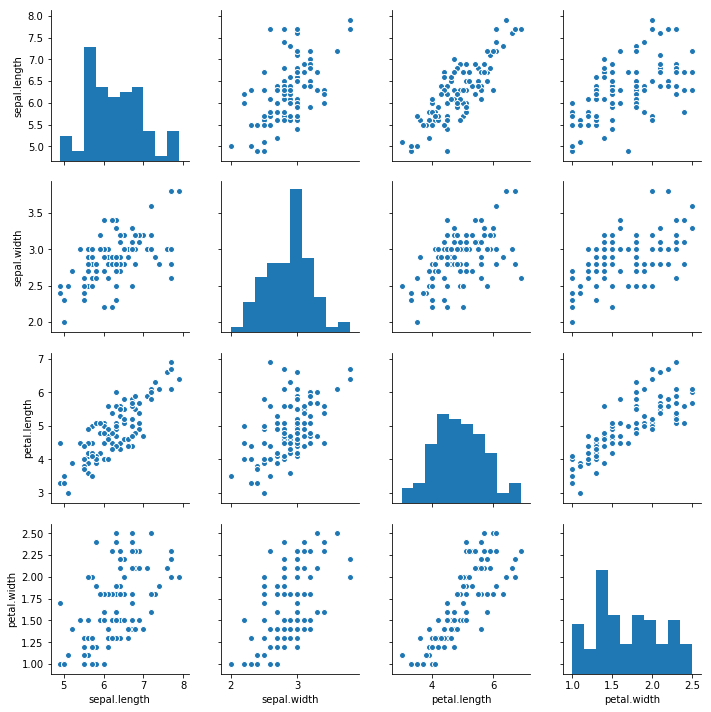

In [17]:
cols = ['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
sns_plot = sns.pairplot(data[cols])

## Sepal length

Статистика по выборке:

Число элементов :  100
Среднее :  6.2620000000000005
Min :  4.9
Max :  7.9
Std :  0.6595119407561929
Median :  6.3
25% :  5.8
75% :  6.7
Межквартильный размах :  0.9000000000000004
Mode :  ModeResult(mode=array([6.3]), count=array([9]))
Skew :  0.30391221665575163
kurtosis :  -0.13998536126102668

Гистограмма:


/home/vadimka/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


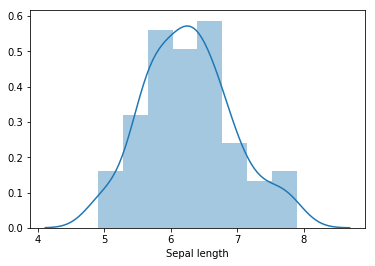

"Ящик с усами":


/usr/lib/python3/dist-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


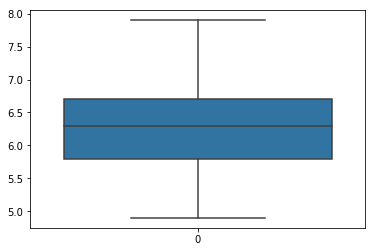

График "Квантиль квантиль":


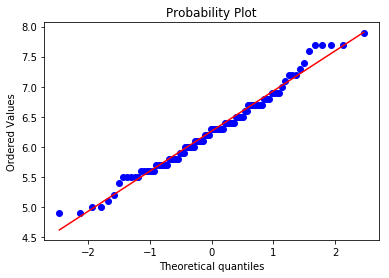

In [8]:
statistic(data['sepal.length'].values, 'Sepal length')

In [9]:
checkNormalDistr(data['sepal.length'].values, 'Sepal length')

Параметр:  Sepal length 

Критерий Колмогорова-Смирнова:
( 0.06712824156506314 0.7774386320464353 )
Выборка подчиняется нормальному закону распределения. 

Кси^2 критерий Пирсона:
( 0.0004700764614916675 0.9962965013226213 )
Выборка подчиняется нормальному закону распределения. 

Преверим так же функцию normaltest из scipy.stats на принадлежность к нормальному закону распределения
( 1.68241023557088 0.43119057476175415 )
Выборка подчиняется нормальному закону распределения. 



## Sepal width

Число элементов :  100
Среднее :  2.8719999999999994
Min :  2.0
Max :  3.8
Std :  0.3310830711468045
Median :  2.9
25% :  2.7
75% :  3.025
Межквартильный размах :  0.32499999999999973
Mode :  ModeResult(mode=array([3.]), count=array([20]))
Skew :  0.036638816527154026
kurtosis :  0.4099377152403103

Гистограмма:


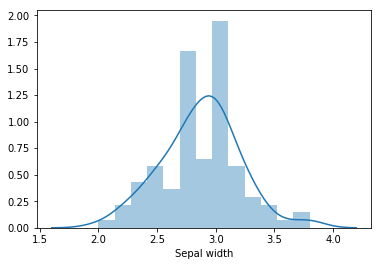

"Ящик с усами":


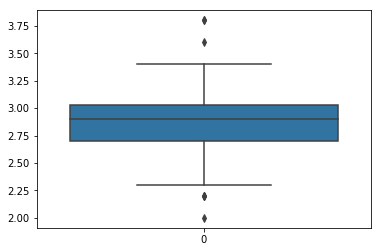

График "Квантиль квантиль":


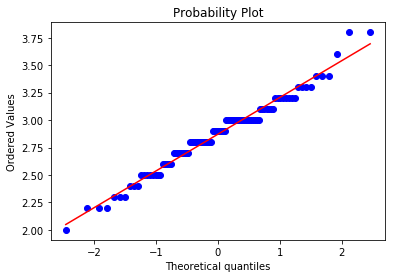

In [10]:
statistic(data['sepal.width'].values, 'Sepal width')

In [11]:
checkNormalDistr(data['sepal.width'].values, 'Sepal width')

Параметр:  Sepal width 

Критерий Колмогорова-Смирнова:
( 0.10047749395469097 0.24828973970414192 )
Выборка подчиняется нормальному закону распределения. 

Кси^2 критерий Пирсона:
( -0.0416878978049706 0.6804736475429485 )
Выборка подчиняется нормальному закону распределения. 

Преверим так же функцию normaltest из scipy.stats на принадлежность к нормальному закону распределения
( 1.2307463417525872 0.5404391815118519 )
Выборка подчиняется нормальному закону распределения. 



## Pelat length

Число элементов :  100
Среднее :  4.906
Min :  3.0
Max :  6.9
Std :  0.8214401986754728
Median :  4.9
25% :  4.375
75% :  5.525
Межквартильный размах :  1.1500000000000004
Mode :  ModeResult(mode=array([4.5]), count=array([8]))
Skew :  0.16849664932580463
kurtosis :  -0.36822358233361063

Гистограмма:


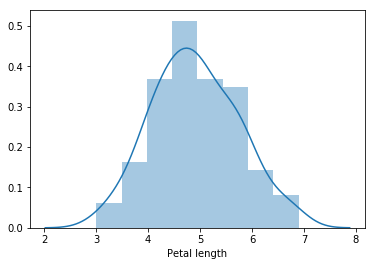

"Ящик с усами":


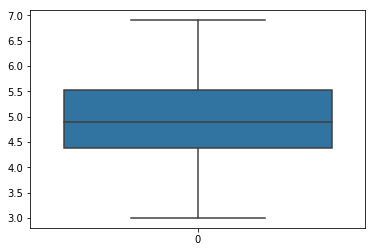

График "Квантиль квантиль":


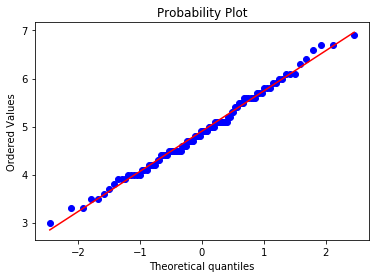

In [12]:
statistic(data['petal.length'].values, 'Petal length')

In [13]:
checkNormalDistr(data['petal.length'].values, 'Petal length')

Параметр:  Petal length 

Критерий Колмогорова-Смирнова:
( 0.06665015765400073 0.7876964914023983 )
Выборка подчиняется нормальному закону распределения. 

Кси^2 критерий Пирсона:
( 0.02194689656013274 0.8284142552590595 )
Выборка подчиняется нормальному закону распределения. 

Преверим так же функцию normaltest из scipy.stats на принадлежность к нормальному закону распределения
( 0.9420830007914336 0.6243516670325002 )
Выборка подчиняется нормальному закону распределения. 



## Petal width

Число элементов :  100
Среднее :  1.6760000000000006
Min :  1.0
Max :  2.5
Std :  0.4226393261399133
Median :  1.6
25% :  1.3
75% :  2.0
Межквартильный размах :  0.7
Mode :  ModeResult(mode=array([1.3]), count=array([13]))
Skew :  0.22935412729808102
kurtosis :  -1.029100838660789

Гистограмма:


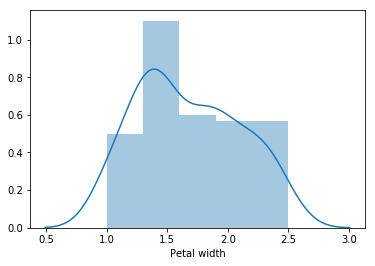

"Ящик с усами":


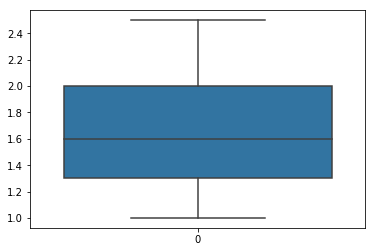

График "Квантиль квантиль":


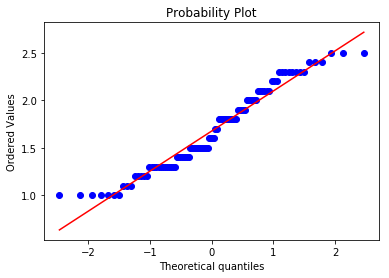

In [14]:
statistic(data['petal.width'].values, 'Petal width')

In [15]:
checkNormalDistr(data['petal.width'].values, 'Petal width')

Параметр:  Petal width 

Критерий Колмогорова-Смирнова:
( 0.1414525744423759 0.03296204981017237 )
Выборка не подчиняется нормальному закону распределения.
Кси^2 критерий Пирсона:
( 0.0034777358726710184 0.9726058528962134 )
Выборка подчиняется нормальному закону распределения. 

Преверим так же функцию normaltest из scipy.stats на принадлежность к нормальному закону распределения
( 16.769312363109435 0.00022834425405067528 )
Выборка не подчиняется нормальному закону распределения.
